### Rate Monotonic Scheduling (RMS) - Fixed Priority Scheduling Algorithm

- Selection Function: 
    - Shortest Period => Highest Priority
- Decisiion Mode:
    - Preemtive
- Task properties:
    - Periodic (T)
    - Deadline (D); D = T
    - Execution Time (C), C <= D
    - Tasks are independent
    
### Schedulability Tests
- Necessary condition:
    - sum(Ci/Ti)<=1
- Sufficient condition
    - sum(Ci/Ti) <= n (2^(1/n)-1), where n: # of tasks

#### Note : If the sufficent condition fails => the given task set may or may not be schedulable.  

#### Author: Sharath Lokesh

In [1]:
import matplotlib.pyplot as plt
from math import gcd
import pandas as pd

In [2]:
def compute_hyper_period(T):
    hyper_period = 1
    for t in T:
        hyper_period = (hyper_period * t) // gcd(hyper_period, t) #compute LCM
    print("\nHyper-Period:", hyper_period)
    return hyper_period

In [3]:
def schedulability_test(C, T):
    
    ret_val = True
    utilization = 0
    for c, t in zip(C, T):
        utilization = utilization + (c/t)
        
    print("Utilization: ", round(utilization,4))
    if (utilization > 1):
        ret_val = False
        print("Utilization is > 1. Therefore the task set is not schedulable.\n")
    suff_cond = len(C) * (2**(1/len(C)) - 1)
    print("Sufficent condition value: ", round(suff_cond,4))
    if (utilization > suff_cond):
        print ("Utilization > Sufficient contdition value - Task set may or may not be scheduled without missing the deadline.\n")
    else:
        print("Sufficient contdition passed: Task set is schedulable.\n")
    return ret_val

In [4]:
def prepare_tasket(C, T):
    # create a sample dataframe
    task_names = ["T"+str(i) for i in range(len(C))]
    priority = [i+1 for i in range(len(C))]

    df = pd.DataFrame({
        'Task-Name': task_names,
        'WCET': C,
        'Time-Period': T,
        'Pending-Scheduling': C
        #'Next-Deadline': T
    })
    print("Given Task-set\n"+ "-"*80)
    print(df.to_string(index=False))
    sorted_df = df.sort_values(by=['Time-Period'])
    print("\nSorted Task-set according to priority of RMS\n"+ "-"*80)
    sorted_df=sorted_df.assign(Priority=priority)
    print(sorted_df.to_string(index=False))
    return sorted_df
    

In [5]:
def get_task(task_set):
    # Filter tasks with non-zero pending execution time
    schedulable_tasks = task_set[task_set["Pending-Scheduling"] > 0]
    
    # If no tasks are schedulable, return None
    if schedulable_tasks.empty:
        return None
    
    # Sort tasks by priority (ascending order of period)
    sorted_tasks = schedulable_tasks.sort_values(by=["Priority"])
    next_task = sorted_tasks.iloc[0]
    
    return next_task["Task-Name"]
    

In [6]:
def update_task_set(task_set, current_time):
    if current_time == 0:
        return task_set
    for task_name, row in task_set.iterrows():
        period = row["Time-Period"]
        if current_time % period == 0:
            task_set.loc[task_name, "Pending-Scheduling"] += row["WCET"]
    return task_set

In [7]:
def gantt_chart(schedule, hyper_period, task_set):
    fig, gnt = plt.subplots(figsize=(3*len(set(schedule)), len(set(schedule))))
    #gnt.set_ylim(0, len(set(schedule))*10)
    gnt.set_xlim(0, hyper_period)
    gnt.set_xlabel('Time')
    gnt.set_ylabel('Task')
    gnt.set_xticks(range(len(schedule)))
    gnt.set_xticklabels(range(len(schedule)))
    
    y_ticks_label = {}
    init_val = 5
    count=0
    deadline_ptr = 1/len(set(schedule))
    for task_name, row in task_set.iterrows():
        y_ticks_label[row["Task-Name"]] = (init_val + count * len(set(schedule)))
        count += 1
    
    gnt.set_yticks(list(y_ticks_label.values()))
    gnt.set_yticklabels(list(y_ticks_label.keys()))
    gnt.grid(True, linestyle='--', alpha=0.6)
    
    task_quantum_time = 1
    height = 1
    for i, task in enumerate(schedule):
        if (task==None):
            continue
        gnt.broken_barh([(i,task_quantum_time)], (y_ticks_label[task], height))

In [8]:
def rate_monotonic_scheduling(C, T):
    ret_val = False
    if len(C) != len(T):
        return print("Array size of Worst Case Execution Time (C) and Time Period (T) must be equal.\n")
    
    print("Schedulability Test")
    print("*"*40)
    
    ret_val = schedulability_test(C, T)
    if (True == ret_val):
        schedule = []
        task_set = prepare_tasket(C,T)
        hyp_period = compute_hyper_period(T)
        print("*"*20)
        print("Schedule")
        print("*"*20)
        for i in range(hyp_period):
            task = get_task(task_set)
            print(i, task, sep="\t")
            schedule.append(task)
            task_set.loc[task_set["Task-Name"] == task, "Pending-Scheduling"] -= 1
            task_set = update_task_set(task_set,i+1)
            #print(task_set.to_string(index=False))
        gantt_chart(schedule, hyp_period, task_set)
            
            

Schedulability Test
****************************************
Utilization:  0.85
Sufficent condition value:  0.7798
Utilization > Sufficient contdition value - Task set may or may not be scheduled without missing the deadline.

Given Task-set
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling
       T0     2            5                   2
       T1     2            8                   2
       T2     2           10                   2

Sorted Task-set according to priority of RMS
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling  Priority
       T0     2            5                   2         1
       T1     2            8                   2         2
       T2     2           10                   2         3

Hyper-Period: 40
********************
Schedule
********************
0	T0
1	T0
2	T1
3	T1
4	T2
5	T0
6	T0
7	T2
8	T1
9	T1

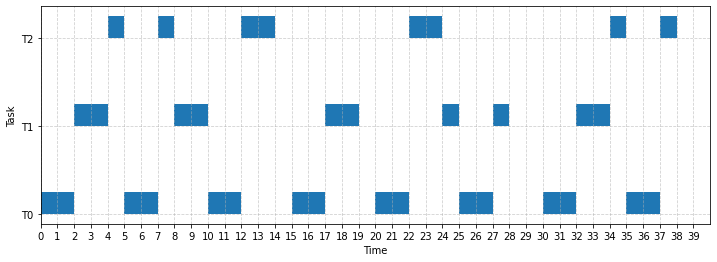

In [9]:
C = [2, 2, 2]
T = [5, 8, 10]
rate_monotonic_scheduling(C, T)

Schedulability Test
****************************************
Utilization:  0.9333
Sufficent condition value:  0.7798
Utilization > Sufficient contdition value - Task set may or may not be scheduled without missing the deadline.

Given Task-set
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling
       T0     2            5                   2
       T1     1            3                   1
       T2     2           10                   2

Sorted Task-set according to priority of RMS
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling  Priority
       T1     1            3                   1         1
       T0     2            5                   2         2
       T2     2           10                   2         3

Hyper-Period: 30
********************
Schedule
********************
0	T1
1	T0
2	T0
3	T1
4	T2
5	T0
6	T1
7	T0
8	T2
9	

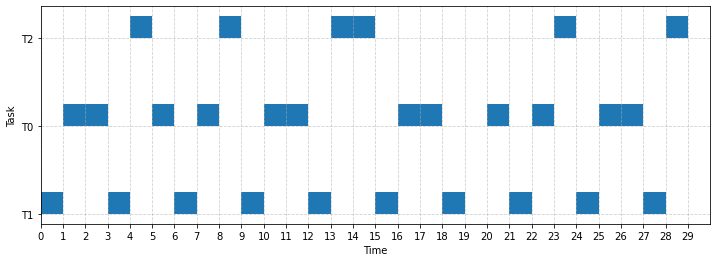

In [10]:
C = [2, 1, 2]
T = [5, 3, 10]
rate_monotonic_scheduling(C, T)

Schedulability Test
****************************************
Utilization:  0.775
Sufficent condition value:  0.8284
Sufficient contdition passed: Task set is schedulable.

Given Task-set
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling
       T0     2            5                   2
       T1     3            8                   3

Sorted Task-set according to priority of RMS
--------------------------------------------------------------------------------
Task-Name  WCET  Time-Period  Pending-Scheduling  Priority
       T0     2            5                   2         1
       T1     3            8                   3         2

Hyper-Period: 40
********************
Schedule
********************
0	T0
1	T0
2	T1
3	T1
4	T1
5	T0
6	T0
7	None
8	T1
9	T1
10	T0
11	T0
12	T1
13	None
14	None
15	T0
16	T0
17	T1
18	T1
19	T1
20	T0
21	T0
22	None
23	None
24	T1
25	T0
26	T0
27	T1
28	T1
29	None
30	T0
31	T0
32	T1
33	T1
34	T1


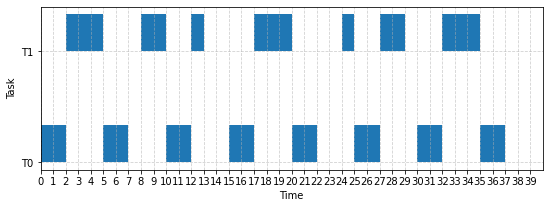

In [11]:
C = [2, 3]
T = [5, 8]
rate_monotonic_scheduling(C, T)